In [194]:
# alpha:finish consulting; beta:new coming;
# overall timer format: (timepoint, event, station id, server id)

class Station:
    def __init__(self, stationid, overall_timer, process_param, n_server=0, n_buffer=0):
        self.stationid = stationid
        self.overall_timer = overall_timer
        self.s = n_server
        self.c = n_buffer
        self.wait = False
        self.status = [0, [0]*n_server] # 1 for occupied
        self.process_param = process_param
        self.next_station = None
    
    def setnext(self, next_station):
        self.next_station = next_station
        
    def printout(self):
        # print("time:{:.04f}".format(self.overall_timer[0][0]), " \tstation "+str(self.stationid)+":", self.status)
        return 0
    
    def update(self, timeslot):
        event= timeslot[1]
        if event == 'alpha':
            serverid = timeslot[3]
            self.alpha(serverid, timeslot)
        else:
            succeed = self.beta(timeslot)
            if not succeed:
                self.overall_timer.append((timeslot[0]+1, timeslot[1], timeslot[2]))
        del(self.overall_timer[0])
        self.overall_timer.sort(key= lambda k:(k[0], int(-k[2])))
        
    def alpha(self, serverid, timeslot):
        if self.next_station == None:
            if self.status[0] > 0: # wqiting line is not empty
                self.status[0] -= 1
                try:
                    self.overall_timer.append((timeslot[0]+np.random.exponential(self.process_param), 'alpha', self.stationid, serverid))
                    self.printout()
                except:
                    print("empty process time list for station", self.stationid, "server", serverid)
            else:
                self.status[1][serverid] = 0
                self.printout()
                return True
        else:
            if self.next_station.beta(timeslot):
                if self.status[0] > 0: # waiting line is not empty
                    self.status[0] -= 1
                    try:
                        self.overall_timer.append((self.overall_timer[0][0]+np.random.exponential(self.process_param), 'alpha', self.stationid, serverid))
                        # del(self.process_times[0])
                        self.printout()
                    except:
                        print("empty process time list for station", self.stationid, "server", serverid)
                else:
                    self.status[1][serverid] = 0
                    self.printout()
                    return True
            else:
                for i in range(len(self.overall_timer)):
                    if self.overall_timer[i][2]==self.stationid+1:
                        self.overall_timer.append((self.overall_timer[i][0], 'alpha', self.stationid, serverid))
                        self.overall_timer.sort(key= lambda k:(k[0], int(-k[2])))
                        return True
                self.overall_timer.append((self.overall_timer[0][0], 'alpha', self.stationid, serverid))
                self.overall_timer.sort(key= lambda k:(k[0], int(-k[2])))
            
    def beta(self, timeslot=None):
        if self.status[0] > 0: 
            if self.status[0]<self.c:
                self.status[0]+=1
                self.printout()
                return True
            else:
                return False
        else:
            i = 0
            while i < self.s:
                if self.status[1][i]==0:
                    self.status[1][i]=1
                    self.overall_timer.append((timeslot[0]+np.random.exponential(self.process_param), 'alpha', self.stationid, i))
                    # self.process_times.remove(self.process_times[0])
                    break
                else:
                    i += 1
            if i == self.s:
                self.status[0]+=1
            self.printout()
            return True
        

In [195]:
import numpy as np
class simulation:
    def run(n_customers):
        timer = []
        t = np.random.poisson(2.1, n_customers)
        for i in range(n_customers):
            timer.append((t[i], 'beta', 0))
        timer.sort(key= lambda k:k[0])
            
        stations = []
        stations.append(Station(stationid=0, overall_timer=timer, process_param=2.9, n_server=1, n_buffer=5))
        stations.append(Station(stationid=1, overall_timer=timer, process_param=2.2, n_server=1, n_buffer=6))
        stations.append(Station(stationid=2, overall_timer=timer, process_param=2.2, n_server=1, n_buffer=6))
        stations.append(Station(stationid=3, overall_timer=timer, process_param=2.8, n_server=1, n_buffer=3))
        stations[2].setnext(stations[3])
        stations[1].setnext(stations[2])
        stations[0].setnext(stations[1])
        
        tt = 0
        while len(timer)>0:
            # print(timer)
            tt = timer[0][0]
            stations[timer[0][2]].update(timer[0])
        return tt
            

In [197]:
simulation.run(n_customers=20)

92.62826183236551

In [198]:
import matplotlib.pyplot as plt
def conf_int_95(y):
    a = np.mean(y)
    b = np.sqrt(np.var(y, ddof=1))
    return (a-1.96*b, a+1.96*b)

(59.0709087949697, 107.12600661621123)


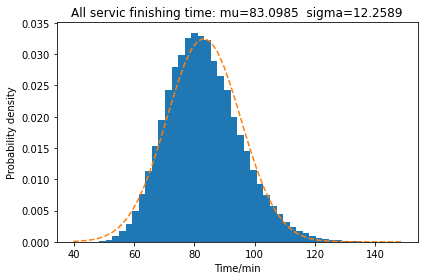

In [200]:
x0 = []
for i in range(100000):
    x0.append(simulation.run(n_customers=20))
x = np.array(x0)
print(conf_int_95(x))

num_bins =  50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()
ax.set_title('All servic finishing time: mu='+str(round(mu, 4))+'  sigma='+str(round(sigma, 4)))
ax.set_xlabel('Time/min')
ax.set_ylabel('Probability density')

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

fig.tight_layout()
plt.show()

0
iteration 0 :  0 %
iteration 0 :  10 %
iteration 0 :  20 %
iteration 0 :  30 %
iteration 0 :  40 %
iteration 0 :  50 %
iteration 0 :  60 %
iteration 0 :  70 %
iteration 0 :  80 %
iteration 0 :  90 %
1
iteration 1 :  0 %
iteration 1 :  10 %
iteration 1 :  20 %
iteration 1 :  30 %
iteration 1 :  40 %
iteration 1 :  50 %
iteration 1 :  60 %
iteration 1 :  70 %
iteration 1 :  80 %
iteration 1 :  90 %
2
iteration 2 :  0 %
iteration 2 :  10 %
iteration 2 :  20 %
iteration 2 :  30 %
iteration 2 :  40 %
iteration 2 :  50 %
iteration 2 :  60 %
iteration 2 :  70 %
iteration 2 :  80 %
iteration 2 :  90 %
3
iteration 3 :  0 %
iteration 3 :  10 %
iteration 3 :  20 %
iteration 3 :  30 %
iteration 3 :  40 %
iteration 3 :  50 %
iteration 3 :  60 %
iteration 3 :  70 %
iteration 3 :  80 %
iteration 3 :  90 %
4
iteration 4 :  0 %
iteration 4 :  10 %
iteration 4 :  20 %
iteration 4 :  30 %
iteration 4 :  40 %
iteration 4 :  50 %
iteration 4 :  60 %
iteration 4 :  70 %
iteration 4 :  80 %
iteration 4 :  

iteration 39 :  20 %
iteration 39 :  30 %
iteration 39 :  40 %
iteration 39 :  50 %
iteration 39 :  60 %
iteration 39 :  70 %
iteration 39 :  80 %
iteration 39 :  90 %
40
iteration 40 :  0 %
iteration 40 :  10 %
iteration 40 :  20 %
iteration 40 :  30 %
iteration 40 :  40 %
iteration 40 :  50 %
iteration 40 :  60 %
iteration 40 :  70 %
iteration 40 :  80 %
iteration 40 :  90 %
41
iteration 41 :  0 %
iteration 41 :  10 %
iteration 41 :  20 %
iteration 41 :  30 %
iteration 41 :  40 %
iteration 41 :  50 %
iteration 41 :  60 %
iteration 41 :  70 %
iteration 41 :  80 %
iteration 41 :  90 %
42
iteration 42 :  0 %
iteration 42 :  10 %
iteration 42 :  20 %
iteration 42 :  30 %
iteration 42 :  40 %
iteration 42 :  50 %
iteration 42 :  60 %
iteration 42 :  70 %
iteration 42 :  80 %
iteration 42 :  90 %
43
iteration 43 :  0 %
iteration 43 :  10 %
iteration 43 :  20 %
iteration 43 :  30 %
iteration 43 :  40 %
iteration 43 :  50 %
iteration 43 :  60 %
iteration 43 :  70 %
iteration 43 :  80 %
itera

iteration 77 :  90 %
78
iteration 78 :  0 %
iteration 78 :  10 %
iteration 78 :  20 %
iteration 78 :  30 %
iteration 78 :  40 %
iteration 78 :  50 %
iteration 78 :  60 %
iteration 78 :  70 %
iteration 78 :  80 %
iteration 78 :  90 %
79
iteration 79 :  0 %
iteration 79 :  10 %
iteration 79 :  20 %
iteration 79 :  30 %
iteration 79 :  40 %
iteration 79 :  50 %
iteration 79 :  60 %
iteration 79 :  70 %
iteration 79 :  80 %
iteration 79 :  90 %
80
iteration 80 :  0 %
iteration 80 :  10 %
iteration 80 :  20 %
iteration 80 :  30 %
iteration 80 :  40 %
iteration 80 :  50 %
iteration 80 :  60 %
iteration 80 :  70 %
iteration 80 :  80 %
iteration 80 :  90 %
81
iteration 81 :  0 %
iteration 81 :  10 %
iteration 81 :  20 %
iteration 81 :  30 %
iteration 81 :  40 %
iteration 81 :  50 %
iteration 81 :  60 %
iteration 81 :  70 %
iteration 81 :  80 %
iteration 81 :  90 %
82
iteration 82 :  0 %
iteration 82 :  10 %
iteration 82 :  20 %
iteration 82 :  30 %
iteration 82 :  40 %
iteration 82 :  50 %
ite

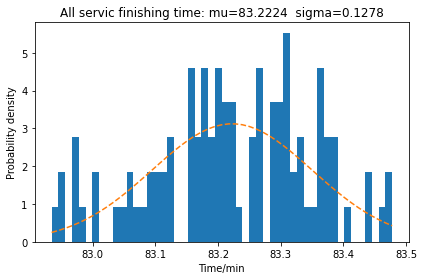

In [205]:
x0 = []
for i in range(100):
    print(i)
    x1 = []
    for j in range(10000):
        if j % 1000 == 0 :
            print("iteration", i, ": ", j//100, "%")
        x1.append(simulation.run(n_customers=20))
    # print(np.var(x1))
    x0.append(np.mean(x1))
x = np.array(x0)
# print(np.var(x0))
print(conf_int_95(x))

num_bins = 50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()
ax.set_title('All servic finishing time: mu='+str(round(mu, 4))+'  sigma='+str(round(sigma, 4)))
ax.set_xlabel('Time/min')
ax.set_ylabel('Probability density')

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

fig.tight_layout()
plt.show()

In [206]:
class simulation1:
    def run(n_customers):
        timer = []
        t = np.random.poisson(2.1, n_customers)
        for i in range(n_customers):
            timer.append((t[i], 'beta', 0))
        timer.sort(key= lambda k:k[0])
            
        stations = []
        stations.append(Station(stationid=0, overall_timer=timer, process_param=2.9, n_server=1, n_buffer=5))
        stations.append(Station(stationid=1, overall_timer=timer, process_param=2.2, n_server=2, n_buffer=6))
        stations.append(Station(stationid=2, overall_timer=timer, process_param=2.2, n_server=3, n_buffer=6))
        stations.append(Station(stationid=3, overall_timer=timer, process_param=2.8, n_server=1, n_buffer=3))
        stations[2].setnext(stations[3])
        stations[1].setnext(stations[2])
        stations[0].setnext(stations[1])
        
        tt = 0
        while len(timer)>0:
            # print(timer)
            tt = timer[0][0]
            stations[timer[0][2]].update(timer[0])
        return tt
            

In [207]:
simulation1.run(n_customers=10)

37.78775967701146

(50.79758284730503, 98.47720272342664)


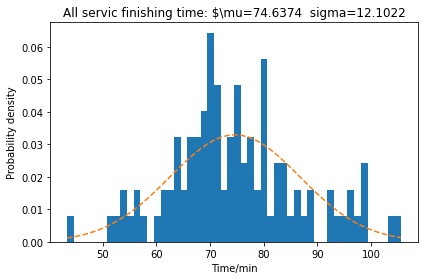

In [210]:
x0 = []
for i in range(100):
    x0.append(simulation1.run(n_customers=20))
x = np.array(x0)
print(conf_int_95(x))

num_bins =  50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()
ax.set_title('All servic finishing time: $\mu='+str(round(mu, 4))+'  sigma='+str(round(sigma, 4)))
ax.set_xlabel('Time/min')
ax.set_ylabel('Probability density')

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

fig.tight_layout()
plt.show()

In [ ]:
x0 = []
for i in range(100):
    print(i)
    x1 = []
    for j in range(10000):
        if j % 1000 == 0 :
            print("iteration", i, ": ", j//100, "%")
        x1.append(simulation1.run(n_customers=20))
    x0.append(np.mean(x1))
x = np.array(x0)
print(conf_int_95(x))

num_bins = 50
mu, sigma = np.mean(x), np.std(x)
fig, ax = plt.subplots()
ax.set_title('All servic finishing time: $\mu='+str(round(mu, 4))+'  sigma='+str(round(sigma, 4)))
ax.set_xlabel('Time/min')
ax.set_ylabel('Probability density')

n, bins, patches = ax.hist(x, num_bins, density=True)

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

fig.tight_layout()
plt.show()

0
iteration 0 :  0 %
iteration 0 :  10 %
iteration 0 :  20 %
iteration 0 :  30 %
iteration 0 :  40 %
iteration 0 :  50 %
iteration 0 :  60 %
iteration 0 :  70 %
iteration 0 :  80 %
iteration 0 :  90 %
1
iteration 1 :  0 %
iteration 1 :  10 %
iteration 1 :  20 %
iteration 1 :  30 %
iteration 1 :  40 %
iteration 1 :  50 %
iteration 1 :  60 %
